In [8]:
biotop_file = '../src/net/out_example.csv'
biotop_file = '../src/net/out_10_01_21_size12.csv'



In [9]:
import csv
import numpy as np




with open(biotop_file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    notzero_count = 0
    for row in csv_reader:
        elements = row['Biotop;percentage;nPatches;']
        elements = elements.split(";")
        if elements[2] != 0:
            notzero_count = notzero_count+1
    
percentage = np.zeros(notzero_count)
nPatches = np.zeros(notzero_count)
bio = {}
with open(biotop_file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        elements = row['Biotop;percentage;nPatches;']
        elements = elements.split(";")
        bio[line_count] = elements[0]
        percentage[line_count] = elements[1]
        nPatches[line_count] = elements[2]
        line_count = line_count +1
        
        


## Histogram of Biotope degeneration distribution

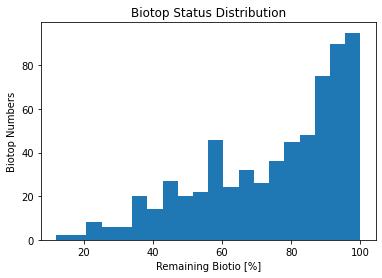

In [10]:
import matplotlib.pyplot as plt

_ = plt.hist([percentage], bins=20)  # arguments are passed to np.histogram
plt.title("Biotop Status Distribution")
plt.ylabel("Biotop Numbers")
plt.xlabel("Remaining Biotio [%]")

plt.show()

### Get all biotopes unter x %

In [17]:
percent_threshold = 30

threshold_index = np.argwhere(percentage < percent_threshold)


for i in threshold_index:
    print(bio[i[0]], percentage[i[0]], "% (", nPatches[i[0]], "Patches)")

bio_563010091 24.0 % ( 37.0 Patches)
bio_565560004 28.0 % ( 7.0 Patches)
bio_564110078 20.0 % ( 39.0 Patches)
bio_564140175 25.0 % ( 70.0 Patches)
bio_563040046 21.0 % ( 70.0 Patches)
bio_564080101 25.0 % ( 35.0 Patches)
bio_564110152 13.0 % ( 22.0 Patches)
bio_564080116 25.0 % ( 40.0 Patches)
bio_564110223 18.0 % ( 53.0 Patches)
bio_564040277 21.0 % ( 70.0 Patches)
bio_564080099 27.0 % ( 40.0 Patches)
bio_563040044 22.0 % ( 121.0 Patches)
bio_563040045 27.0 % ( 59.0 Patches)
bio_563080256 24.0 % ( 53.0 Patches)
bio_564140184 28.0 % ( 7.0 Patches)
bio_564130207 12.0 % ( 8.0 Patches)
bio_564080103 27.0 % ( 40.0 Patches)
bio_565290553 26.0 % ( 26.0 Patches)


## Development of biotope degeneration (for maschine learning analysis)

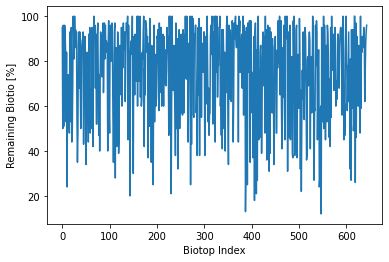

In [13]:
import matplotlib.pyplot as plt

plt.plot(percentage)
plt.xlabel("Biotop Index")
plt.ylabel("Remaining Biotio [%]")
plt.show()

# Read biotope text files

## Get surface of target_biotop

In [14]:
import os
biotop_directory = '../data/output_biotop_dir/'
target_biotop = '563010062'

def getBioInfo(target_txt):
    file = open(target_txt,"r")
    return file
 
def getSurface(file):
    # returns surface in m^2 of biotope(file)
    for i,line in enumerate(file):
        if i == 11:
            return line[28:34]
            
    

folder_path = [x[0] for x in os.walk(biotop_directory)]
target_dir = "\n".join(s for s in folder_path if target_biotop.lower() in s.lower())
target_txt = target_dir+"/"+target_biotop+"_info.txt"

info_file = getBioInfo(target_txt)
surface = getSurface(info_file)
print("Surface of Biotope", target_biotop, ":", surface, "m2")


Surface of Biotope 563010062 : 2999.7 m2


## Get surface of all target_biotop

In [15]:
import os
biotop_directory = '../data/output_biotop_dir/'
A = 0
for i, current_folder in enumerate(folder_path):
    if i != 0:
        current_txt = current_folder+"/"+current_folder[30:]+"_info.txt"
        info_file = getBioInfo(current_txt)
        temp_A = float(getSurface(info_file))
        A = A+temp_A

print(round(A,2), "m2")
print(round(A/1000000,2), "km2")
        

1060659.72 m2
1.06 km2


### Get mean (total) [%]

In [39]:
mean = np.mean(percentage)
print(round(mean,2), "%")

74.98 %


### Estimate not existing biotop surface

In [33]:
total = (100-mean)/100 * A
print(round(total,2), "m2 of ", round(A,2), "m2")
print(round(total/1000000,2), "km2 of ", round(A/1000000,2), "km2")




265411.98 m2 of  1060659.72 m2
0.27 km2 of  1.06 km2
